# Let's solve the moving pendulum problem:

#### This problem is from the book 'Classical Mechanics' by David Morin (problem 6.3 of the section 'Lagrangian Method').

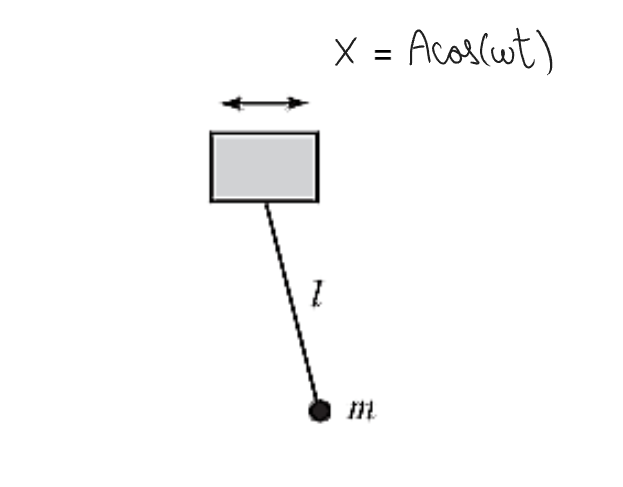

$\newcommand{\lgr}{\mathcal{L}}$
### Looking to solve for $\theta$, the angle between the massless stick with lenght $l$, that holds out mass $m$, and the vertical, we first write our lagrangian, with coordinates $X, Y$ arbitrarily defined by:

$(X, Y) = (x + l\sin(\theta), -l\cos(\theta))$ where $x = A\cos(\omega t)$, as defined in the exercise.

**obs: note these coordinates are simply the x and y axis we are used to.**

### We therefore have:

$\dot{X} = \dot{x}+l\dot{\theta}\cos(\theta)$

$\dot{Y} = l\dot{\theta}\sin(\theta)$

--> $V^2 = \dot{X}^2+\dot{Y}^2$ --> $V^2 = \dot{x}^2 + l^2\dot{\theta}^2\cos^2\theta+2\dot{x}\dot{\theta}l\cos\theta+l^2\dot{\theta}^2\sin^2\theta$

### Which leads to an Kinetic Energy given by:
$T = \frac{1}{2}m(\dot{x}^2+l^2\dot{\theta}^2 + 2\dot{x}\dot{\theta}l\cos\theta)$

### And the potential is simply:
$U = -mgl\cos\theta$

### And finally, the Lagrangian is:
$\lgr = \frac{1}{2}m(\dot{x}^2+l^2\dot{\theta}^2 + 2\dot{x}\dot{\theta}l\cos\theta) + mgl\cos\theta$

### Solving by Euler-Lagrange's method:
$\frac{\partial \lgr}{\partial \theta} = \frac{d}{dt}(\frac{\partial \lgr}{\partial \dot{\theta}})$

$-mgl\sin\theta -m\dot{x}\dot{\theta}l\sin\theta = \frac{d}{dt}(ml^2\dot{\theta}+m\dot{x}l\cos\theta)$

$-mgl\sin\theta -m\dot{x}\dot{\theta}l\sin\theta = ml^2\ddot{\theta} +ml\ddot{x}\cos\theta -ml\dot{x}\dot{\theta}\sin\theta$

$-g\sin\theta = l\ddot{\theta} + \ddot{x}\cos\theta$

### With $x = A\cos(\omega t):$

$\ddot{\theta}-\frac{A}{l}\omega^2\cos(\omega t )\cos\theta + \frac{g}{l}\sin\theta = 0$

### This is our full differential equation for $\theta$ without applying small angles approximation  

### For small angles, which means using $\cos\theta \approx 1, \sin\theta \approx \theta$:
$$\ddot{\theta}+\frac{g}{l}\theta  - \frac{A}{l}\omega^2\cos(\omega t) = 0$$
### Let $a = \frac{A}{l}, \mu = \sqrt{\frac{g}{l}}$:
$$\ddot{\theta} + \mu^2\theta -a\omega^2\cos(\omega t)$$

### To solve this differential equation, let's use sympy librabry.

In [2]:
import sympy as sp

a = sp.Symbol('a')
w0 = sp.Symbol('mu')
w = sp.Symbol('w')
t = sp.Symbol('t')
theta = sp.Function('theta')(t)

diffeq = sp.Eq(theta.diff(t,t) + w0**2*theta - a*w**2*sp.cos(w*t),0)
display(diffeq)
theta_solved = sp.dsolve(diffeq,theta)
display(theta_solved)

Eq(-a*w**2*cos(t*w) + mu**2*theta(t) + Derivative(theta(t), (t, 2)), 0)

Eq(theta(t), C1*exp(-I*mu*t) + C2*exp(I*mu*t) - a*w**2*cos(t*w)/(-mu**2 + w**2))

### This code:
> defines our constants, the function we're looking for ($\theta(t)$), and our independent variable ($t$)

> defines our differential equation using the method 'sp.Eq' and the solves it algebraically

### Separing the real part and renaming some constants, we then have:
$$\theta(t) = C\cos(\mu t + \phi) + \dfrac{a\omega^2\cos(\omega t)}{\mu^2-\omega^2}$$
### Where $C$ and $\phi$ are constants defined by the initial conditions.

## Giving initial conditions
### Let's solve again the differential equation with sympy giving now well defined initial conditions:
> Lets say the angle at the beginning is 0(the pendulum starts at the vertical):
$\theta(0) = 0$

> Lets say the ratio change in the angle at the beginning is also 0:
$\dfrac{d}{dt}\theta(0) = 0$

In [3]:
theta_i = {theta.subs(t, 0):0,theta.diff().subs(t,0):0} #giving the initial conditions
theta_solved_i = sp.dsolve(diffeq, theta, ics=theta_i)
display(theta_solved_i)

Eq(theta(t), -a*w**2*cos(t*w)/(-mu**2 + w**2) + a*w**2*exp(I*mu*t)/(-2*mu**2 + 2*w**2) + a*w**2*exp(-I*mu*t)/(-2*mu**2 + 2*w**2))